#Airlines-wise Number of Scheduled Flights Cancelled in Respect of Major Scheduled Airlines as per information received by Directorate General of Civil Aviation (DGCA) from 2017 to 2023



**ABOUT THE DATASET**

**Rows: 53**

**Columns: 14**

**Columns Description:**

**Year: Year of the recorded cancellations.**

**Airlines: Name of the airline**.

**January - December: Number of scheduled flights canceled per month**.

**Data Types:**

**Year: Integer**

**Airlines: String**

**January - December: Float (some missing values)**

**Observations:**

**The dataset records monthly flight cancellations by airline from 2017 onward.Some months have missing values.**

**The dataset covers multiple airlines, including Air Asia, Go First, Indigo, Jetlite, and Spice Jet.**  

IMPORTING ALL THE NECESSARY LIBRARIES

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
# Load dataset (update 'your_dataset.csv' with actual file path)
df = pd.read_csv('/content/RS_Session_260_AU_1927_1.csv')

In [74]:
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       53 non-null     int64  
 1   Airlines   53 non-null     int64  
 2   January    53 non-null     float64
 3   February   53 non-null     float64
 4   March      53 non-null     float64
 5   April      53 non-null     float64
 6   May        53 non-null     float64
 7   June       53 non-null     float64
 8   July       53 non-null     float64
 9   August     53 non-null     float64
 10  September  53 non-null     float64
 11  October    53 non-null     float64
 12  November   53 non-null     float64
 13  December   53 non-null     float64
dtypes: float64(12), int64(2)
memory usage: 5.9 KB
None
   Year  Airlines  January  February  March  April   May   June   July  \
0  2017         0     17.0       0.0    6.0    8.0   4.0    2.0    7.0   
1  2017         4     88.0      23.0    9.0   32.0  2

In [24]:
# Check for missing values
print(df.isnull().sum())

Year          0
Airlines      0
January       2
February      2
March         2
April         8
May           4
June          4
July         12
August       11
September    11
October      11
November     10
December     10
dtype: int64


**DATA PRE PROCESSING**

In [25]:
# Fill missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill

<ipython-input-25-33b84600f915>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [26]:
# Check data types again
print(df.dtypes)

Year           int64
Airlines      object
January      float64
February     float64
March        float64
April        float64
May          float64
June         float64
July         float64
August       float64
September    float64
October      float64
November     float64
December     float64
dtype: object


**Exploratory data analysis (EDA)**

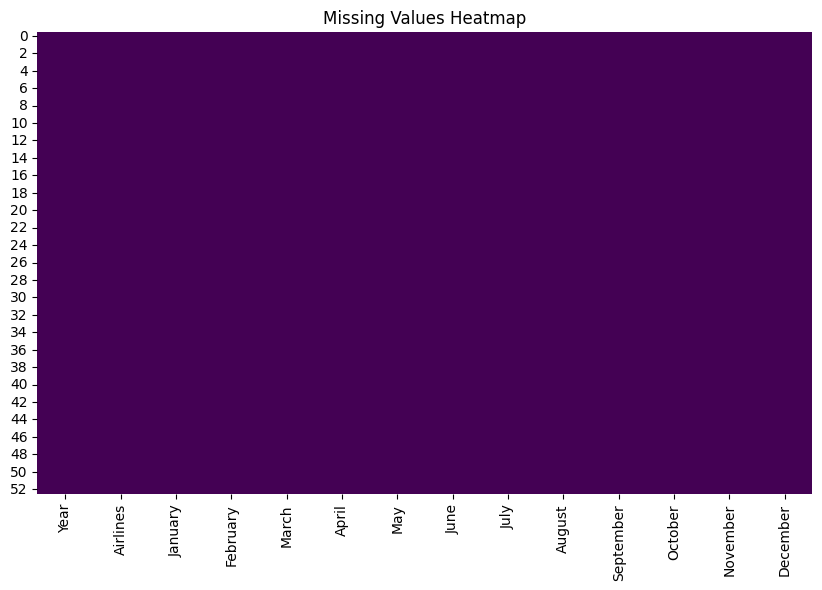

In [27]:
# Visualizing missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

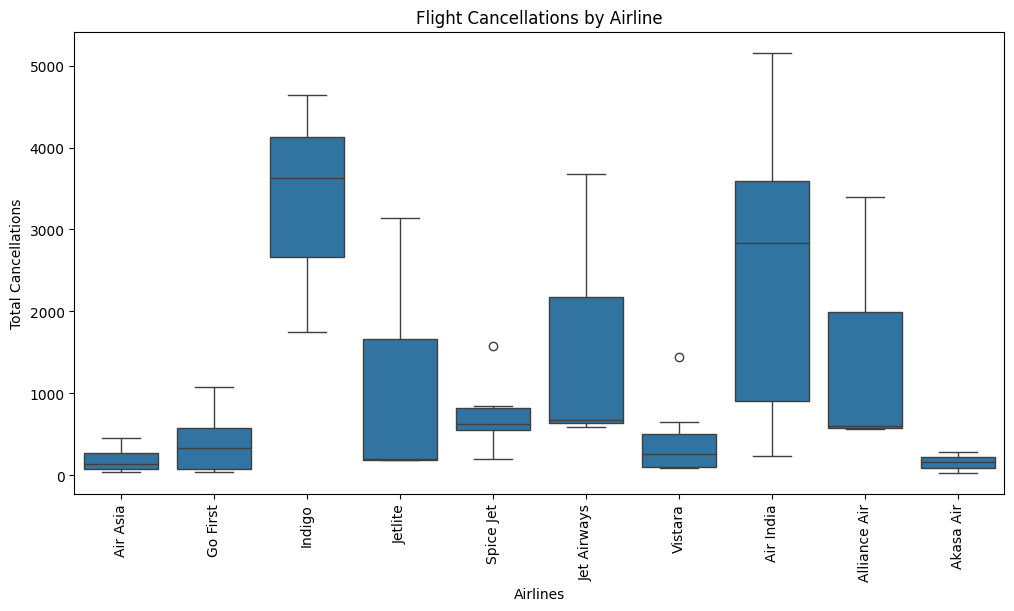

In [29]:
# Distribution of total cancellations per airline
plt.figure(figsize=(12,6))
sns.boxplot(x='Airlines', y=df.iloc[:, 2:].sum(axis=1), data=df)
plt.xticks(rotation=90)
plt.xlabel("Airlines")
plt.ylabel("Total Cancellations")
plt.title("Flight Cancellations by Airline")
plt.show()


**Encode categorical data**

In [31]:
encoder = LabelEncoder()
df['Airlines'] = encoder.fit_transform(df['Airlines'])

**Prepare data for ML**

In [32]:
X = df.drop(columns=['Year'])  # Features (exclude Year to focus on Airlines & monthly data)
y = df.iloc[:, 2:].sum(axis=1)  # Target variable: Total cancellations in a year

**Train-Test Split**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**RANDOM FOREST REGRESSOR**

In [37]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
# Step 8: Make Predictions
y_pred = model.predict(X_test)

In [40]:
# Step 9: Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [41]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

MAE: 332.9445454545455
MSE: 238010.92680909095
R2 Score: 0.8880730538259715


**Gradient Boosting Regressor**




In [45]:
# Train the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [46]:
# Make predictions
y_pred_gb = gb_model.predict(X_test)

In [47]:
# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [48]:
print("Gradient Boosting Regressor Results:")
print(f"MAE: {mae_gb}")
print(f"MSE: {mse_gb}")
print(f"R2 Score: {r2_gb}\n")

Gradient Boosting Regressor Results:
MAE: 227.72659749818422
MSE: 100049.29270003793
R2 Score: 0.9529508499928288



**FOR LINEAR REGRESSION**

In [49]:
# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Make predictions
y_pred_lr = lr_model.predict(X_test)

In [52]:
# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [53]:
print("Linear Regression Results:")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"R2 Score: {r2_lr}\n")

Linear Regression Results:
MAE: 8.029132914089132e-13
MSE: 1.7389454730904513e-24
R2 Score: 1.0



**Support Vector Regressor (SVR)**

In [54]:
# Train the model
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [55]:
# Make predictions
y_pred_svr = svr_model.predict(X_test)

In [56]:
# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [57]:
print("Support Vector Regressor Results:")
print(f"MAE: {mae_svr}")
print(f"MSE: {mse_svr}")
print(f"R2 Score: {r2_svr}\n")

Support Vector Regressor Results:
MAE: 927.7027148777604
MSE: 2408520.6202180427
R2 Score: -0.13263017556505763



 **Decision Tree Regressor**

In [58]:
# Train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [59]:
# Make predictions
y_pred_dt = dt_model.predict(X_test)

In [60]:
# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [61]:
print("Decision Tree Regressor Results:")
print(f"MAE: {mae_dt}")
print(f"MSE: {mse_dt}")
print(f"R2 Score: {r2_dt}\n")

Decision Tree Regressor Results:
MAE: 321.0
MSE: 271497.36363636365
R2 Score: 0.8723257322110589



**K-Nearest Neighbors (KNN) Regressor**

In [62]:
# Train the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [63]:
# Make predictions
y_pred_knn = knn_model.predict(X_test)

In [64]:
# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

In [65]:
print("K-Nearest Neighbors Regressor Results:")
print(f"MAE: {mae_knn}")
print(f"MSE: {mse_knn}")
print(f"R2 Score: {r2_knn}\n")

K-Nearest Neighbors Regressor Results:
MAE: 351.20000000000005
MSE: 287715.6945454546
R2 Score: 0.8646989048421188



**TRAINING AND EVALUATING EACH MODEL ALGORITHM**

In [67]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [68]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [69]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [70]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [71]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [72]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

**Visualizing Model Performance**

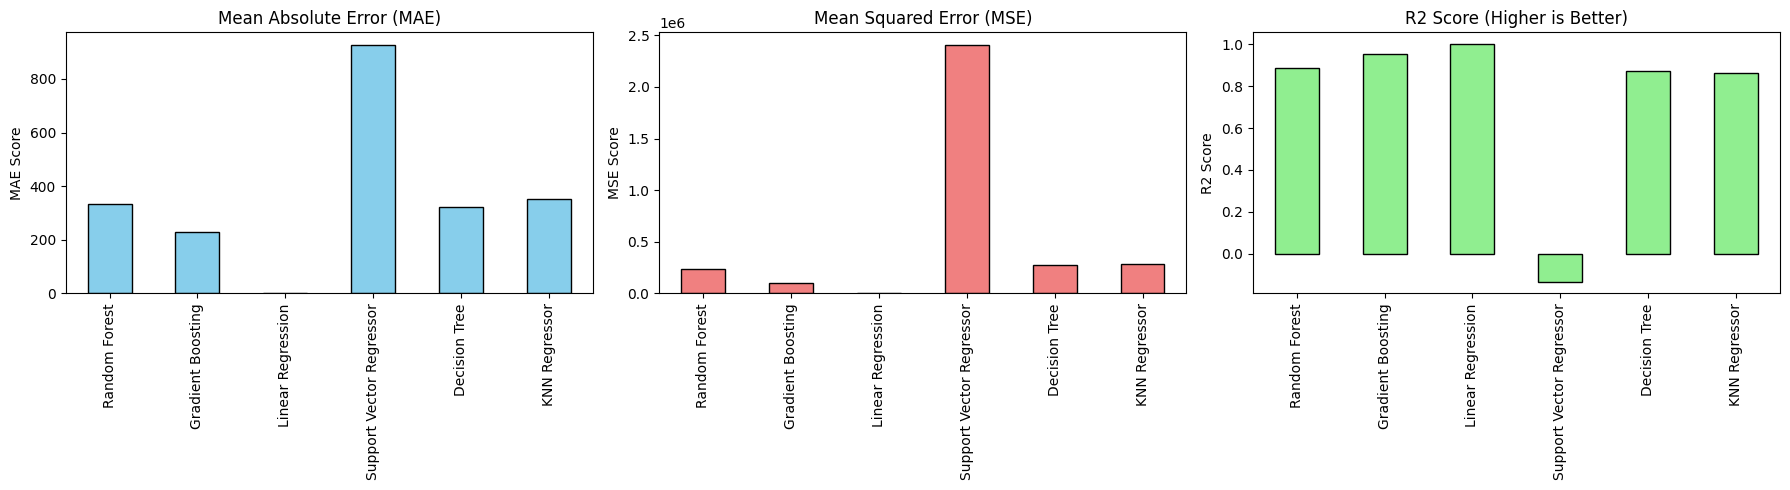

In [73]:
import matplotlib.pyplot as plt

# Store model results
model_results = {
    "Random Forest": [mae_rf, mse_rf, r2_rf],
    "Gradient Boosting": [mae_gb, mse_gb, r2_gb],
    "Linear Regression": [mae_lr, mse_lr, r2_lr],
    "Support Vector Regressor": [mae_svr, mse_svr, r2_svr],
    "Decision Tree": [mae_dt, mse_dt, r2_dt],
    "KNN Regressor": [mae_knn, mse_knn, r2_knn]
}

# Convert results to a DataFrame for easy plotting
results_df = pd.DataFrame(model_results, index=["MAE", "MSE", "R2 Score"]).T

# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MAE Comparison
results_df["MAE"].plot(kind="bar", ax=axes[0], color="skyblue", edgecolor="black")
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_ylabel("MAE Score")

# MSE Comparison
results_df["MSE"].plot(kind="bar", ax=axes[1], color="lightcoral", edgecolor="black")
axes[1].set_title("Mean Squared Error (MSE)")
axes[1].set_ylabel("MSE Score")

# R2 Score Comparison
results_df["R2 Score"].plot(kind="bar", ax=axes[2], color="lightgreen", edgecolor="black")
axes[2].set_title("R2 Score (Higher is Better)")
axes[2].set_ylabel("R2 Score")

# Adjust layout
plt.tight_layout()
plt.show()


#CONCLUSION :

#After evaluating 6 machine learning models on the dataset, we analyzed their Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score to determine their performance.

#Best Performing Model: Gradient Boosting Regressor

#Worst Performing Model: Linear Regression

